Python Libraries

In [14]:
import pandas as pd                                         # type: ignore
import numpy as np                                          # type: ignore
import seaborn as sns                                       # type: ignore
import matplotlib.pyplot as plt                             # type: ignore
import datetime as dt
from sklearn.model_selection import train_test_split        # type: ignore 
from sklearn.preprocessing import MinMaxScaler              # type: ignore
import math
from sklearn.linear_model import LinearRegression           # type: ignore
from sklearn.metrics import  mean_squared_error, r2_score   # type: ignore
from sklearn.linear_model import Lasso,Ridge,ElasticNet     # type: ignore
import statsmodels.api as sm                                # type: ignore
import scipy.stats as stats                                 # type: ignore
import pickle
import joblib
import seaborn as sns                                       # type: ignore

# Objective

The project's purpose is to enhance the accuracy of house price predictions using multiple 
linear regression and regularization techniques. By rigorously applying and comparing 
different regression models, including standard multiple linear regression and regularized 
methods such as Ridge Regression, Lasso, and Elastic Net. This involves optimizing 
model parameters, evaluating performance metrics, and selecting the best approach for 
forecasting house prices based on a comprehensive dataset. 

# 1. Dataset Selection and Initial Exploration 

In [15]:
df_housing=pd.read_csv("Housing.csv")
df_housing.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [16]:
#KNOW THE NUMBER OF ROWS AND COLUMNS IN THE DATAFRAME
df_housing.shape

(21613, 21)

In [17]:
#DETERMINE THE NUMBER OF NON NULL VALUES OF EACH FEATURE AND THE DATA TYPE OF IT
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [18]:
#STATISTICS FOR THE NUMERIC FEATURES OF THE DATAFRAME
df_housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [19]:
#STATISTICS FOR NO NUMERIC FEATURES OF THE DATAFRAME
df_housing.describe(include="O")

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [20]:
#use value counts to determine if the data is discrete, continuous, nominal, ordinal
#df_housing["beds"].value_counts()

# 2. Data Cleaning 

In [21]:
#DROPING DUPLICATE VALUES WITHIN THE DATAFRAME
df_housing.drop_duplicates()
df_housing.shape

(21613, 21)

In [22]:
#CONVERT THE DATA TYPE OF DATE FROM OBJECT TO DATETIME
#COLUMN: DATE
df_housing["date"]=pd.to_datetime(df_housing["date"])
df_housing["date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: date
Non-Null Count  Dtype         
--------------  -----         
21613 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 169.0 KB


In [23]:
#COLUMN: BATHROOM & FLOORS
df_housing["bathrooms"].value_counts()
df_housing["floors"].value_counts()
df_housing=df_housing.astype({'bathrooms': 'int64','floors':'int64'})

In [24]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  int64         
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  int64         
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

C:\Users\alexa\AppData\Local\Temp\ipykernel_8864\2611456547.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box.set_xticklabels([readable_numbers(x) for x in g.get_xticks()]) #modify the label of the ticks in the x axis of a plot


Text(0.5, 1.0, 'Distribution of number of bathrooms')

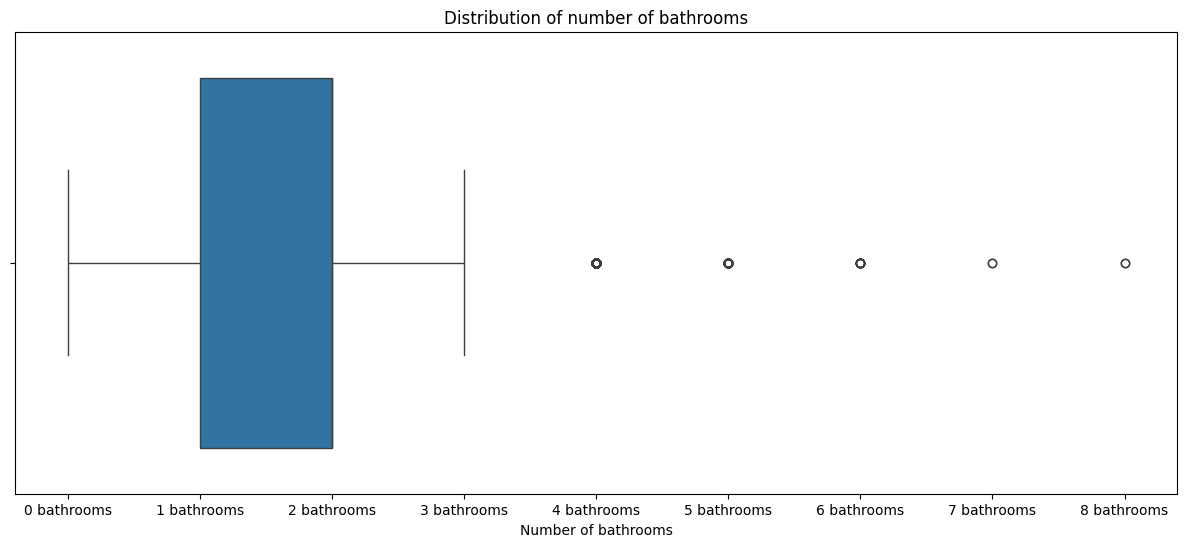

In [25]:
def readable_numbers(x):
    return f'{int(x)} bathrooms'

# Create boxplot
plt.figure(figsize=(15,6))

box = sns.boxplot(x=df_housing['bathrooms'])
g = plt.gca()   #Get Current Axes
box.set_xticklabels([readable_numbers(x) for x in g.get_xticks()]) #modify the label of the ticks in the x axis of a plot
plt.xlabel('Number of bathrooms')
plt.title('Distribution of number of bathrooms')

C:\Users\alexa\AppData\Local\Temp\ipykernel_8864\2979916683.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box.set_xticklabels([readable_numbers(x) for x in g.get_xticks()])


Text(0.5, 1.0, 'Distribution of number of bedrooms')

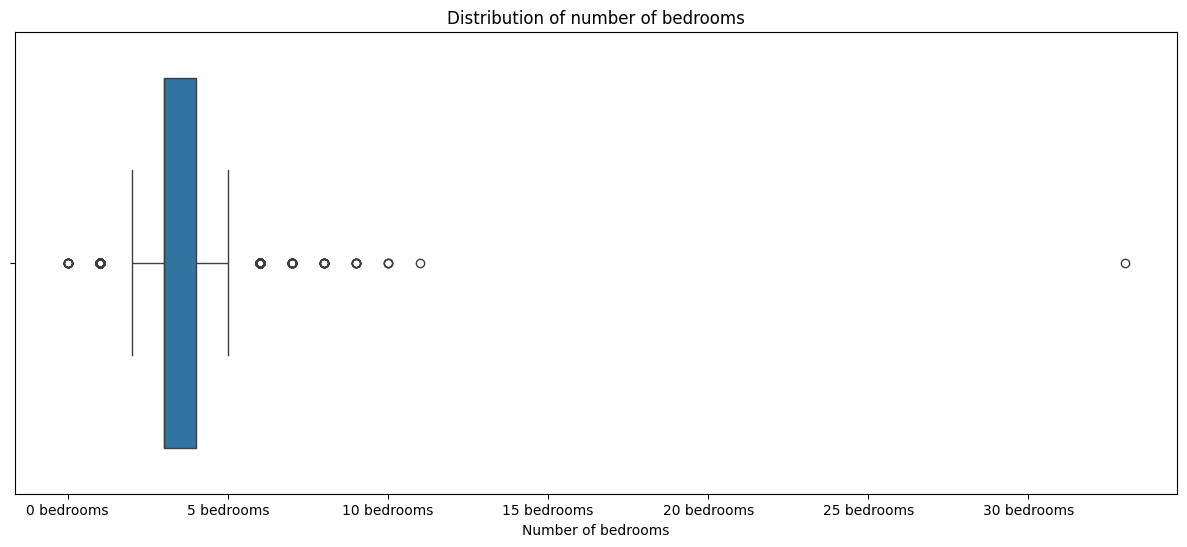

In [26]:
def readable_numbers(x):
    return f'{int(x)} bedrooms'

# Create boxplot
plt.figure(figsize=(15,6))
box = sns.boxplot(x=df_housing['bedrooms'])
g = plt.gca()
box.set_xticklabels([readable_numbers(x) for x in g.get_xticks()])
plt.xlabel('Number of bedrooms')
plt.title('Distribution of number of bedrooms')

C:\Users\alexa\AppData\Local\Temp\ipykernel_8864\3016138872.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box.set_xticklabels([readable_numbers(x) for x in g.get_xticks()])


Text(0.5, 1.0, 'Distribution of number of sqft_living')

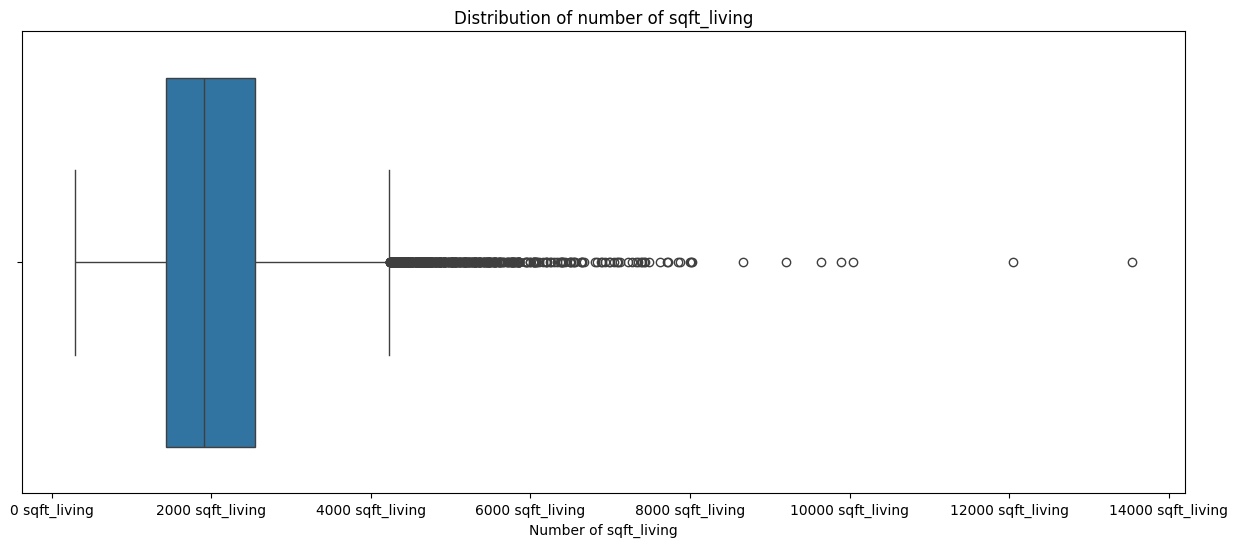

In [27]:
def readable_numbers(x):
    return f'{int(x)} sqft_living'

# Create boxplot
plt.figure(figsize=(15,6))
box = sns.boxplot(x=df_housing['sqft_living'])
g = plt.gca()
box.set_xticklabels([readable_numbers(x) for x in g.get_xticks()])
plt.xlabel('Number of sqft_living')
plt.title('Distribution of number of sqft_living')

In [28]:
# Calculate 25th percentile of ...
percentile25 = df_housing['bedrooms'].quantile(0.25)

# Calculate 75th percentile of ...
percentile75 = df_housing['bedrooms'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit_bedrooms = percentile75 + 1.5 * iqr
lower_limit_bedrooms = percentile25 - 1.5 * iqr

print(upper_limit_bedrooms)

5.5


In [29]:
# Calculate 25th percentile of ...
percentile25 = df_housing['bathrooms'].quantile(0.25)

# Calculate 75th percentile of ...
percentile75 = df_housing['bathrooms'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit_bathrooms = percentile75 + 1.5 * iqr
lower_limit_bathrooms = percentile25 - 1.5 * iqr

print(upper_limit_bathrooms)

3.5


In [30]:
# Calculate 25th percentile of ...
percentile25 = df_housing['sqft_living'].quantile(0.25)

# Calculate 75th percentile of ...
percentile75 = df_housing['sqft_living'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit_sqft_living = percentile75 + 1.5 * iqr
lower_limit_sqft_living = percentile25 - 1.5 * iqr

print(upper_limit_sqft_living)

4234.5


In [31]:
df_housing = df_housing[df_housing['bedrooms'] <= 6]

In [32]:
df_housing = df_housing[df_housing['sqft_living'] <= 4500]

In [33]:
df_housing = df_housing[df_housing['bathrooms'] <= 4]

In [34]:
df_housing.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.118500e+04,21185,2.118500e+04,21185.000000,21185.000000,21185.000000,2.118500e+04,21185.000000,21185.000000,21185.000000,...,21185.000000,21185.000000,21185.000000,21185.000000,21185.000000,21185.000000,21185.000000,21185.000000,21185.000000,21185.000000
mean,4.589801e+09,2014-10-29 08:47:40.287939584,5.173256e+05,3.338022,1.713004,2018.103800,1.454043e+04,1.437999,0.006420,0.215152,...,7.603635,1741.104366,276.999434,1970.745008,83.368704,98078.352136,47.559404,-122.214858,1957.991173,12355.527921
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124079e+09,2014-07-22 00:00:00,3.200000e+05,3.000000,1.000000,1410.000000,5.005000e+03,1.000000,0.000000,0.000000,...,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.468500,-122.329000,1480.000000,5082.000000
50%,3.905001e+09,2014-10-16 00:00:00,4.470000e+05,3.000000,2.000000,1890.000000,7.555000e+03,1.000000,0.000000,0.000000,...,7.000000,1540.000000,0.000000,1974.000000,0.000000,98065.000000,47.570900,-122.233000,1820.000000,7570.000000
75%,7.334400e+09,2015-02-17 00:00:00,6.300000e+05,4.000000,2.000000,2500.000000,1.045400e+04,2.000000,0.000000,0.000000,...,8.000000,2160.000000,540.000000,1996.000000,0.000000,98118.000000,47.678600,-122.126000,2330.000000,9995.000000
max,9.900000e+09,2015-05-27 00:00:00,3.400000e+06,6.000000,4.000000,4500.000000,1.651359e+06,3.000000,1.000000,4.000000,...,13.000000,4500.000000,2240.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,560617.000000
std,2.877631e+09,NaN,2.995512e+05,0.867562,0.678804,796.917677,3.982274e+04,0.551057,0.079867,0.731756,...,1.106633,745.574653,417.017302,29.329337,399.304001,53.511254,0.139224,0.140878,645.942055,25408.131768


In [35]:
df_housing.shape

(21185, 21)

In [36]:
# DELETE ROWS WITH ZERO IN BEDROOMS OR BATHROOMS
df_housing = df_housing[df_housing['bedrooms'] != 0]
df_housing = df_housing[df_housing['bathrooms'] != 0]
df_housing.shape

(21095, 21)

# 3. Feature Engineering 

In [37]:
df_housing["yr_renovated"].value_counts()


yr_renovated
0       20214
2014       91
2013       36
2007       35
2005       34
        ...  
1948        1
1951        1
1959        1
1934        1
1944        1
Name: count, Length: 70, dtype: int64

In [38]:
df_housing["yr_renovated"].sort_values(ascending=True)

17          0
21588       0
21589       0
21591       0
21592       0
         ... 
11633    2015
5683     2015
7417     2015
16683    2015
18575    2015
Name: yr_renovated, Length: 21095, dtype: int64

In [39]:
#Manual One Hot encoding
def categorize_age(years):
    if years == 0:
        return 0
    else:
        return 1
    
df_housing['Renovated'] = df_housing['yr_renovated'].apply(categorize_age)

df_housing=df_housing.drop(['yr_renovated'], axis=1)


In [40]:
df_housing.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated
0,7229300521,2014-10-13,231300.0,2,1,1180,5650,1,0,0,...,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,0


<Figure size 1200x600 with 0 Axes>

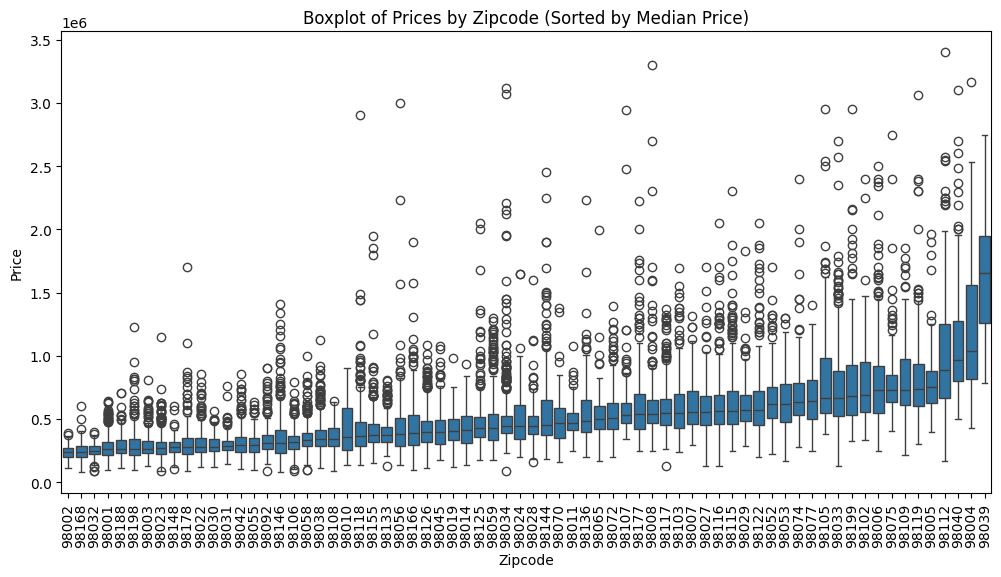

In [41]:
# Ordering Encoding for zipcode

plt.figure(figsize=(12, 6))
# Calculate the median price for each zipcode
median_prices = df_housing.groupby('zipcode')['price'].median().reset_index()

# Sort the zipcodes by median price from lowest to highest
median_prices_sorted = median_prices.sort_values(by='price')
median_prices_sorted['zipcode_label'] = range(1, median_prices_sorted.shape[0] + 1)

# labeling encoding
df_housing = df_housing.merge(median_prices_sorted[['zipcode', 'zipcode_label']], on='zipcode')

# Reorder df_housing_model based on median_prices_sorted for boxplot
df_housing_model_ordered = df_housing[df_housing['zipcode'].isin(median_prices_sorted['zipcode'])]

# Plot the boxplot with seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='zipcode', y='price', data=df_housing_model_ordered, order=median_prices_sorted['zipcode'])
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.title('Boxplot of Prices by Zipcode (Sorted by Median Price)')
plt.xticks(rotation=90)
plt.show()

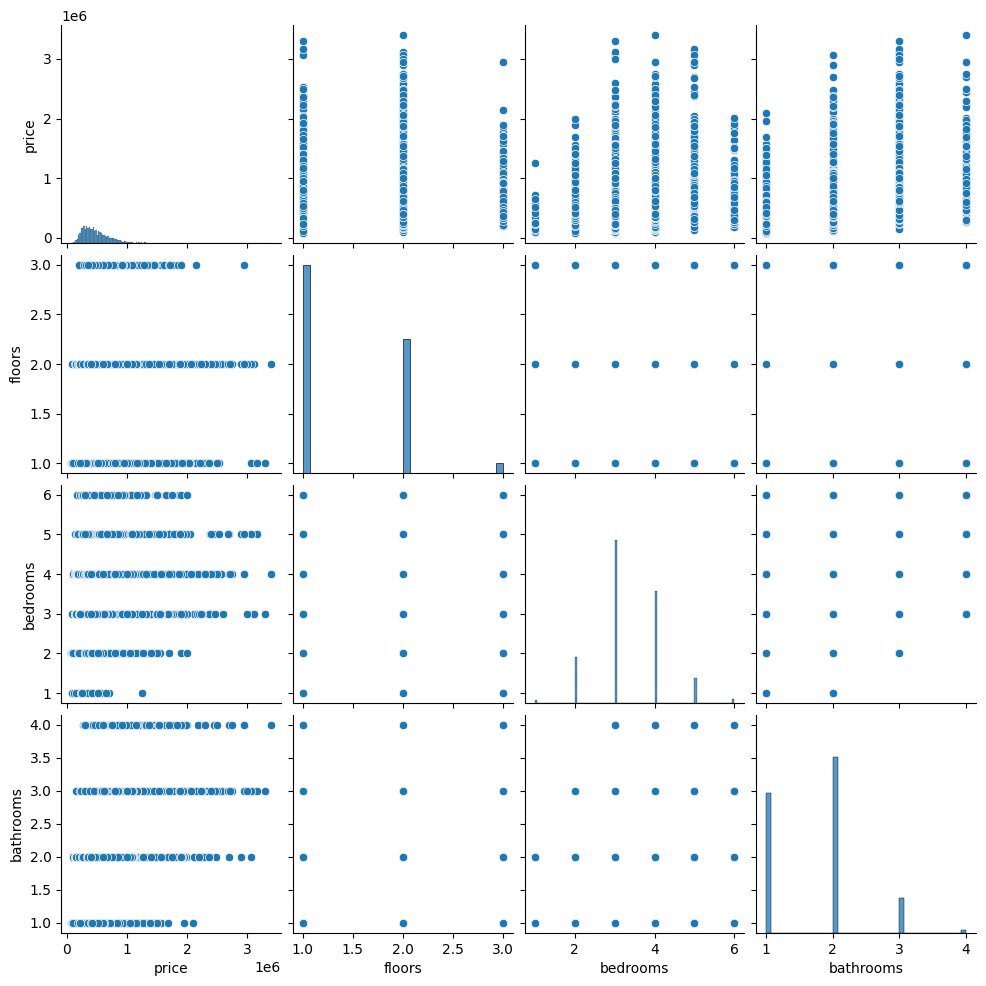

In [42]:
df_housing_sub=df_housing[["price","floors","bedrooms","bathrooms"]]
sns.pairplot(df_housing_sub)

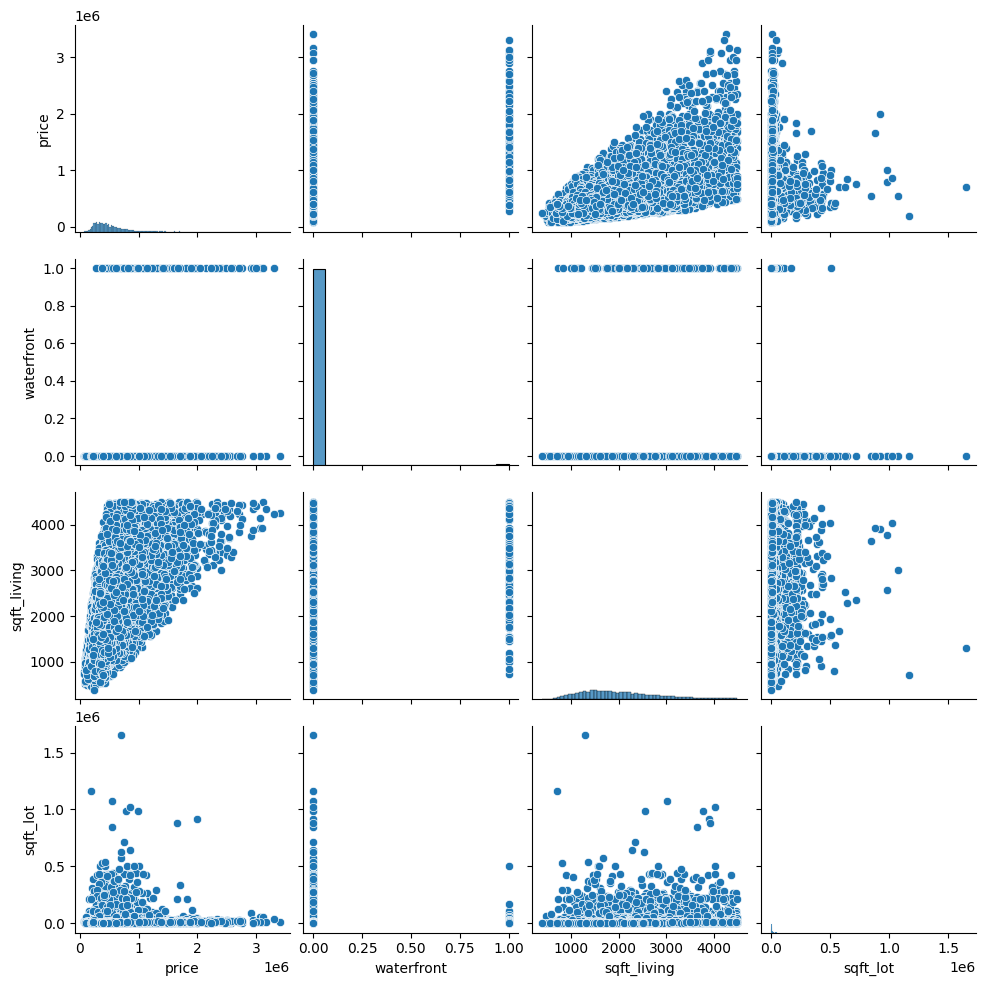

In [43]:
df_housing_sub2=df_housing[["price","waterfront","sqft_living","sqft_lot"]]
sns.pairplot(df_housing_sub2)

# 4. DATA SPLITTING

C:\Users\alexa\AppData\Local\Temp\ipykernel_8864\2911168236.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y['price'], shade=True, color="blue", label="Density Function of Price (100% of Data)")
C:\Users\alexa\AppData\Local\Temp\ipykernel_8864\2911168236.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train['price'], shade=True, color="red", label="Density Function of Price for train Data(80% of Data)", alpha=0.5)


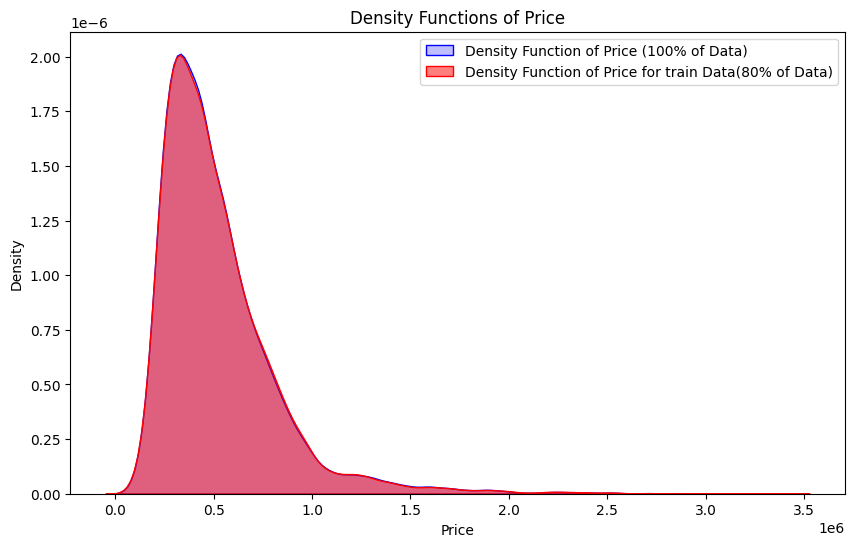

In [44]:
df_housing_model = df_housing.copy()

X = df_housing_model.drop(columns = ["price"])
y = df_housing_model[["price"]]

# Import the scaler function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))

# Density function for data["model"]
sns.kdeplot(y['price'], shade=True, color="blue", label="Density Function of Price (100% of Data)")

# Density function for X["model"]
sns.kdeplot(y_train['price'], shade=True, color="red", label="Density Function of Price for train Data(80% of Data)", alpha=0.5)

# Adding label and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Functions of Price')
plt.legend()

# 5. Data Visualization in Python

In [45]:
# Load the dataset
file_path = "housing_cleaned.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(data.head())

   Unnamed: 0          id       date   price  bedrooms  bathrooms  \
0           0  7229300521 2014-10-13  231300         2          1   
1           1  6414100192 2014-12-09  538000         3          2   
2           2  5631500400 2015-02-25  180000         2          1   
3           3  2487200875 2014-12-09  604000         4          3   
4           4  1954400510 2015-02-18  510000         3          2   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650       1           0  ...      7        1180   
1         2570      7242       2           0  ...      7        2170   
2          770     10000       1           0  ...      6         770   
3         1960      5000       1           0  ...      7        1050   
4         1680      8080       1           0  ...      8        1680   

   sqft_basement  yr_built  zipcode      lat     long  sqft_living15  \
0              0      1955    98178  47.5112 -122.257           1340   
1       

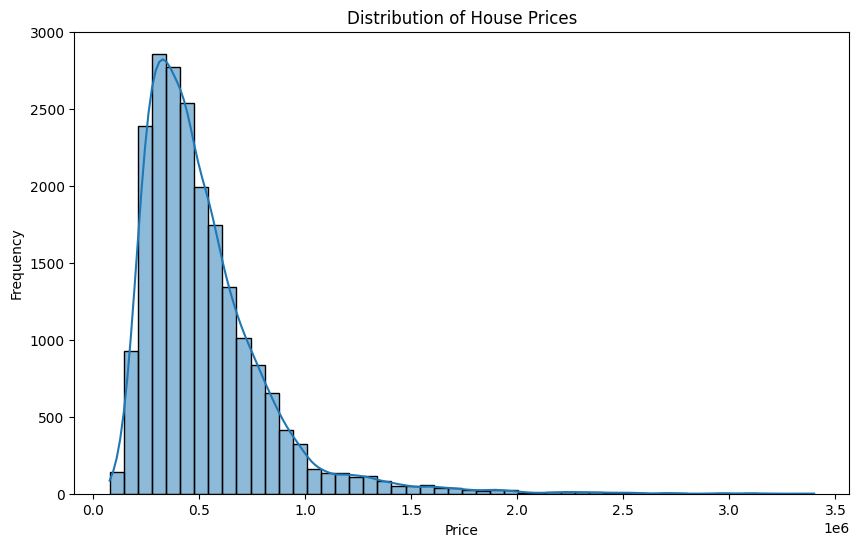

In [46]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('static/img/house_prices_distribution.png')

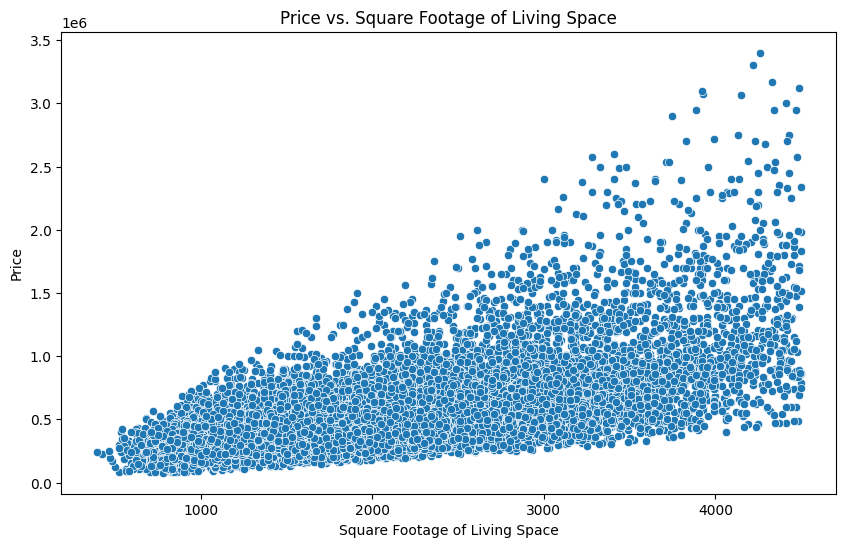

In [47]:
# Price vs. Other Features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=data)
plt.title('Price vs. Square Footage of Living Space')
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price')
plt.show()


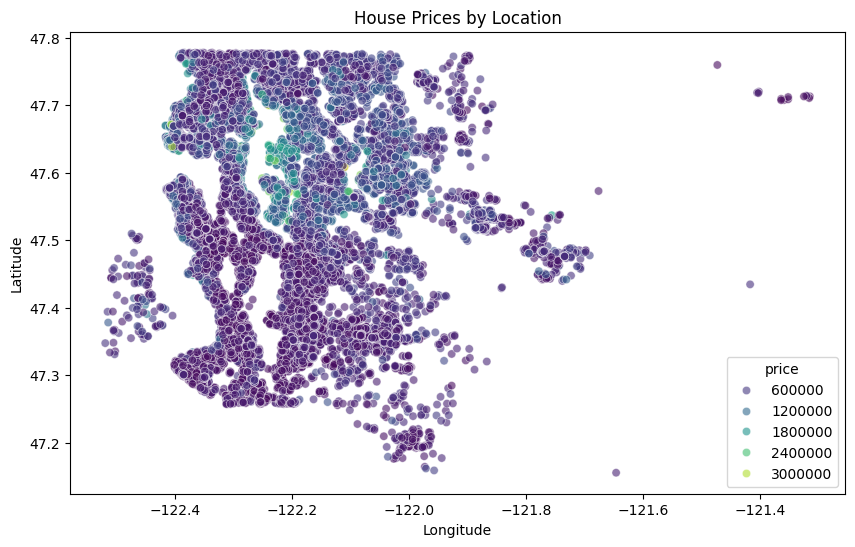

In [48]:
# Price by Location
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', hue='price', data=data, palette='viridis', alpha=0.6)
plt.title('House Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


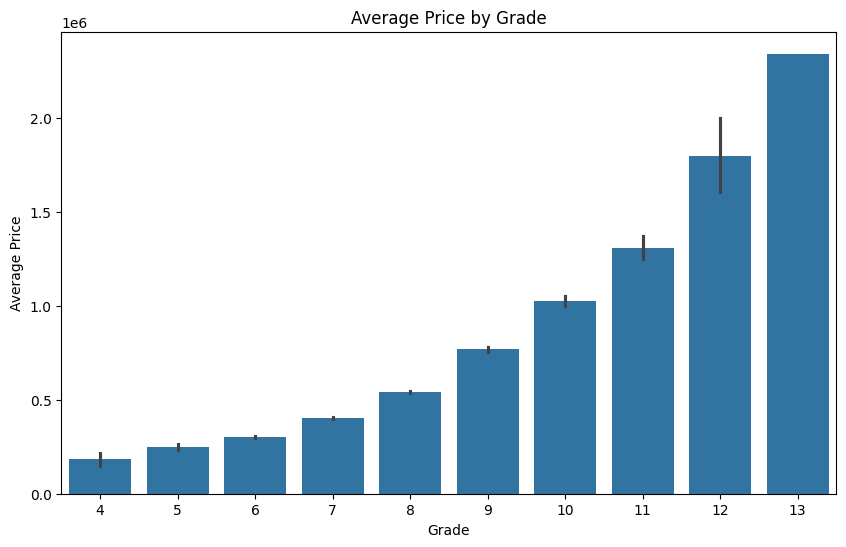

In [49]:
# Categorical Analysis
# Bar Plot: Average Price by Grade
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='price', data=data)
plt.title('Average Price by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Price')
plt.show()


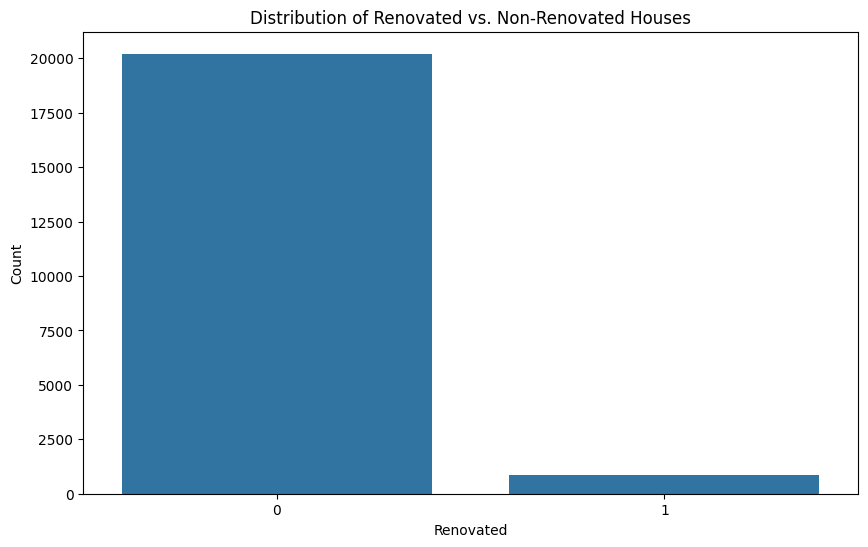

In [50]:
# Distribution of Renovated Houses
plt.figure(figsize=(10, 6))
sns.countplot(x='Renovated', data=data)
plt.title('Distribution of Renovated vs. Non-Renovated Houses')
plt.xlabel('Renovated')
plt.ylabel('Count')
plt.show()


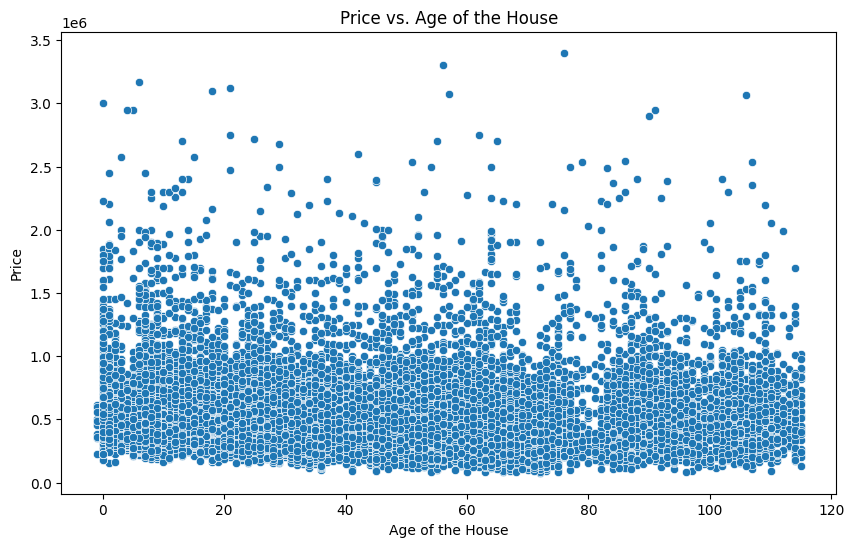

In [51]:
# Price vs. Age of the House
data['age'] = data['date'].dt.year - data['yr_built']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price', data=data)
plt.title('Price vs. Age of the House')
plt.xlabel('Age of the House')
plt.ylabel('Price')
plt.show()


In [52]:
# Load the dataset
file_path = "housing_cleaned.xlsx"
data = pd.read_excel(file_path)

# Prepare data for visualizations
yr_built_price = data.groupby('yr_built')['price'].mean().reset_index()
sqft_living_price = data[['sqft_living', 'price']]
sqft_lot_price = data[['sqft_lot', 'price']]
floors_price = data.groupby('floors')['price'].mean().reset_index()
view_price = data[['view', 'price']]
condition_price = data.groupby('condition')['price'].mean().reset_index()
grade_price = data.groupby('grade')['price'].mean().reset_index()
waterfront_price = data.groupby('waterfront')['price'].mean().reset_index()

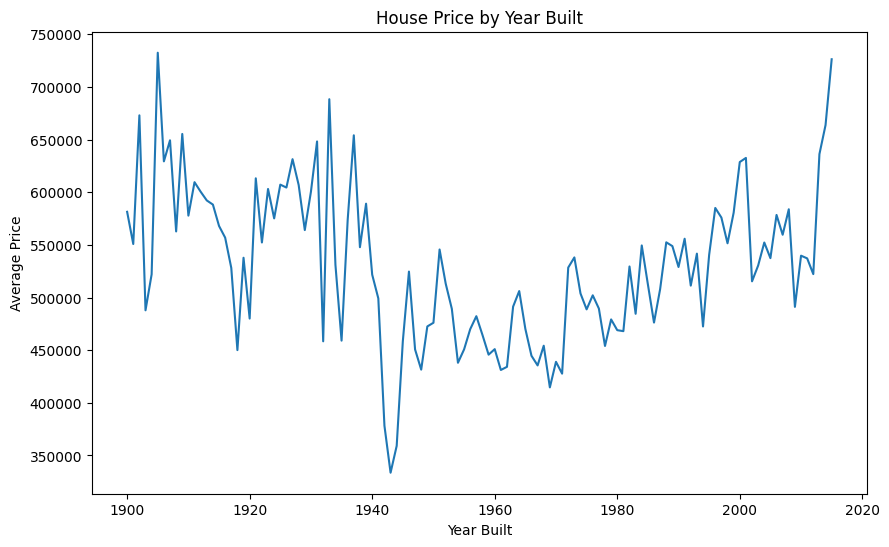

In [53]:
# Line Chart: House Price by Year Built
plt.figure(figsize=(10, 6))
sns.lineplot(x='yr_built', y='price', data=yr_built_price)
plt.title('House Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.show()

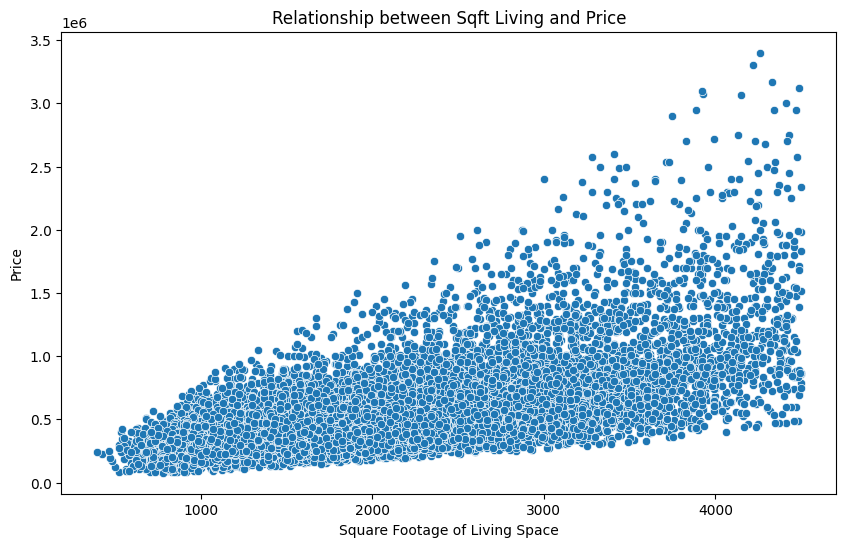

In [54]:
# Scatter Plot: Relationship between Sqft Living and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=sqft_living_price)
plt.title('Relationship between Sqft Living and Price')
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price')
plt.show()

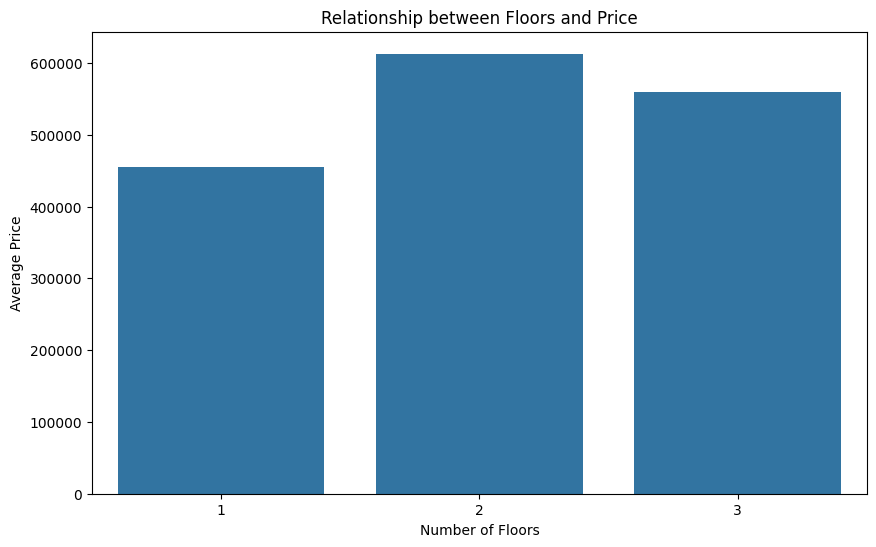

In [55]:
# Bar Chart: Relationship between Floors and Price
plt.figure(figsize=(10, 6))
sns.barplot(x='floors', y='price', data=floors_price)
plt.title('Relationship between Floors and Price')
plt.xlabel('Number of Floors')
plt.ylabel('Average Price')
plt.show()

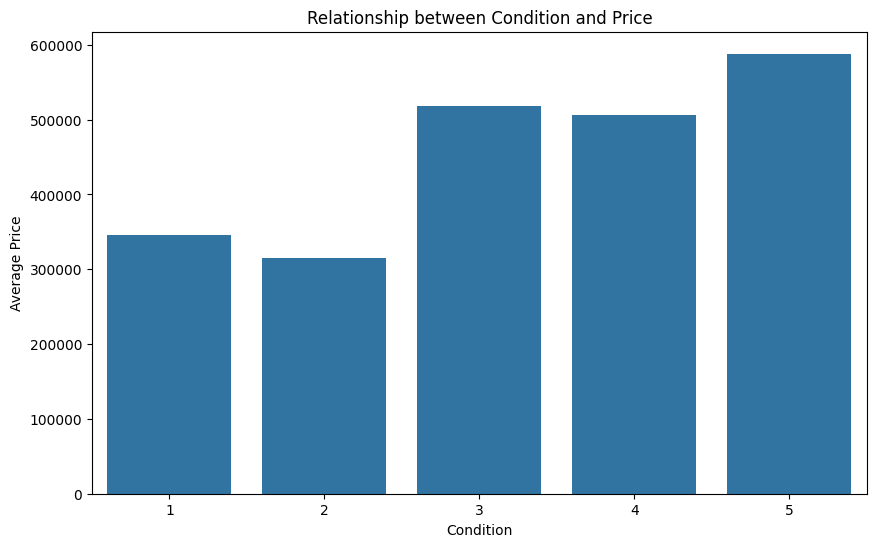

In [56]:
# Bar Chart: Relationship between Condition and Price
plt.figure(figsize=(10, 6))
sns.barplot(x='condition', y='price', data=condition_price)
plt.title('Relationship between Condition and Price')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.show()

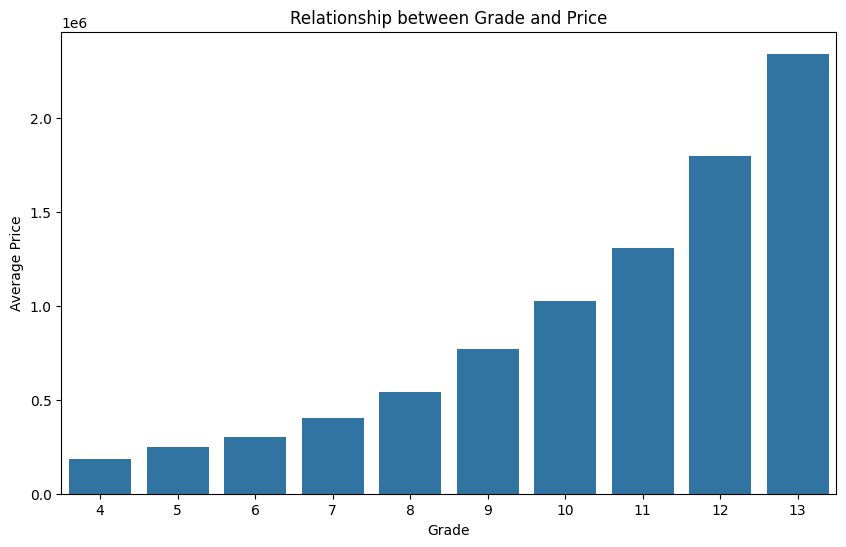

In [57]:
# Bar Chart: Relationship between Grade and Price
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='price', data=grade_price)
plt.title('Relationship between Grade and Price')
plt.xlabel('Grade')
plt.ylabel('Average Price')
plt.show()

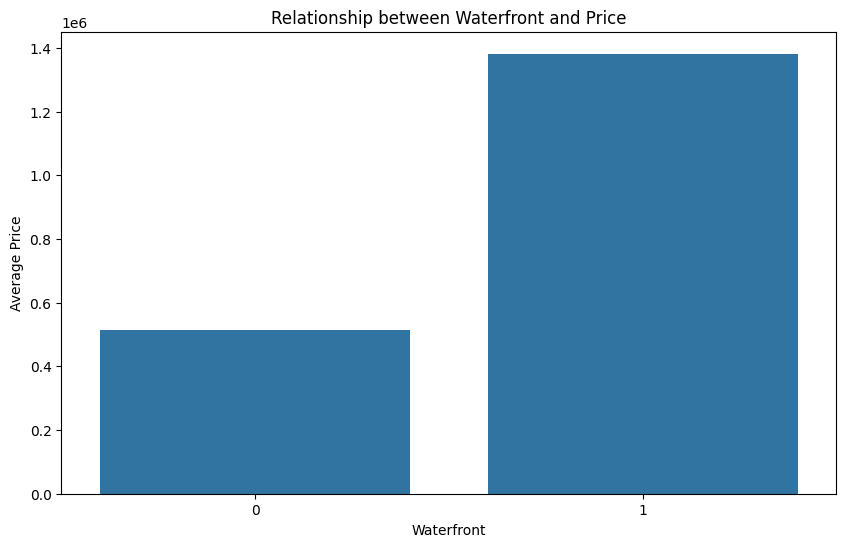

In [58]:
# Bar Chart: Relationship between Waterfront and Price
plt.figure(figsize=(10, 6))
sns.barplot(x='waterfront', y='price', data=waterfront_price)
plt.title('Relationship between Waterfront and Price')
plt.xlabel('Waterfront')
plt.ylabel('Average Price')
plt.show()

# 6. Regression Analysis

<Axes: >

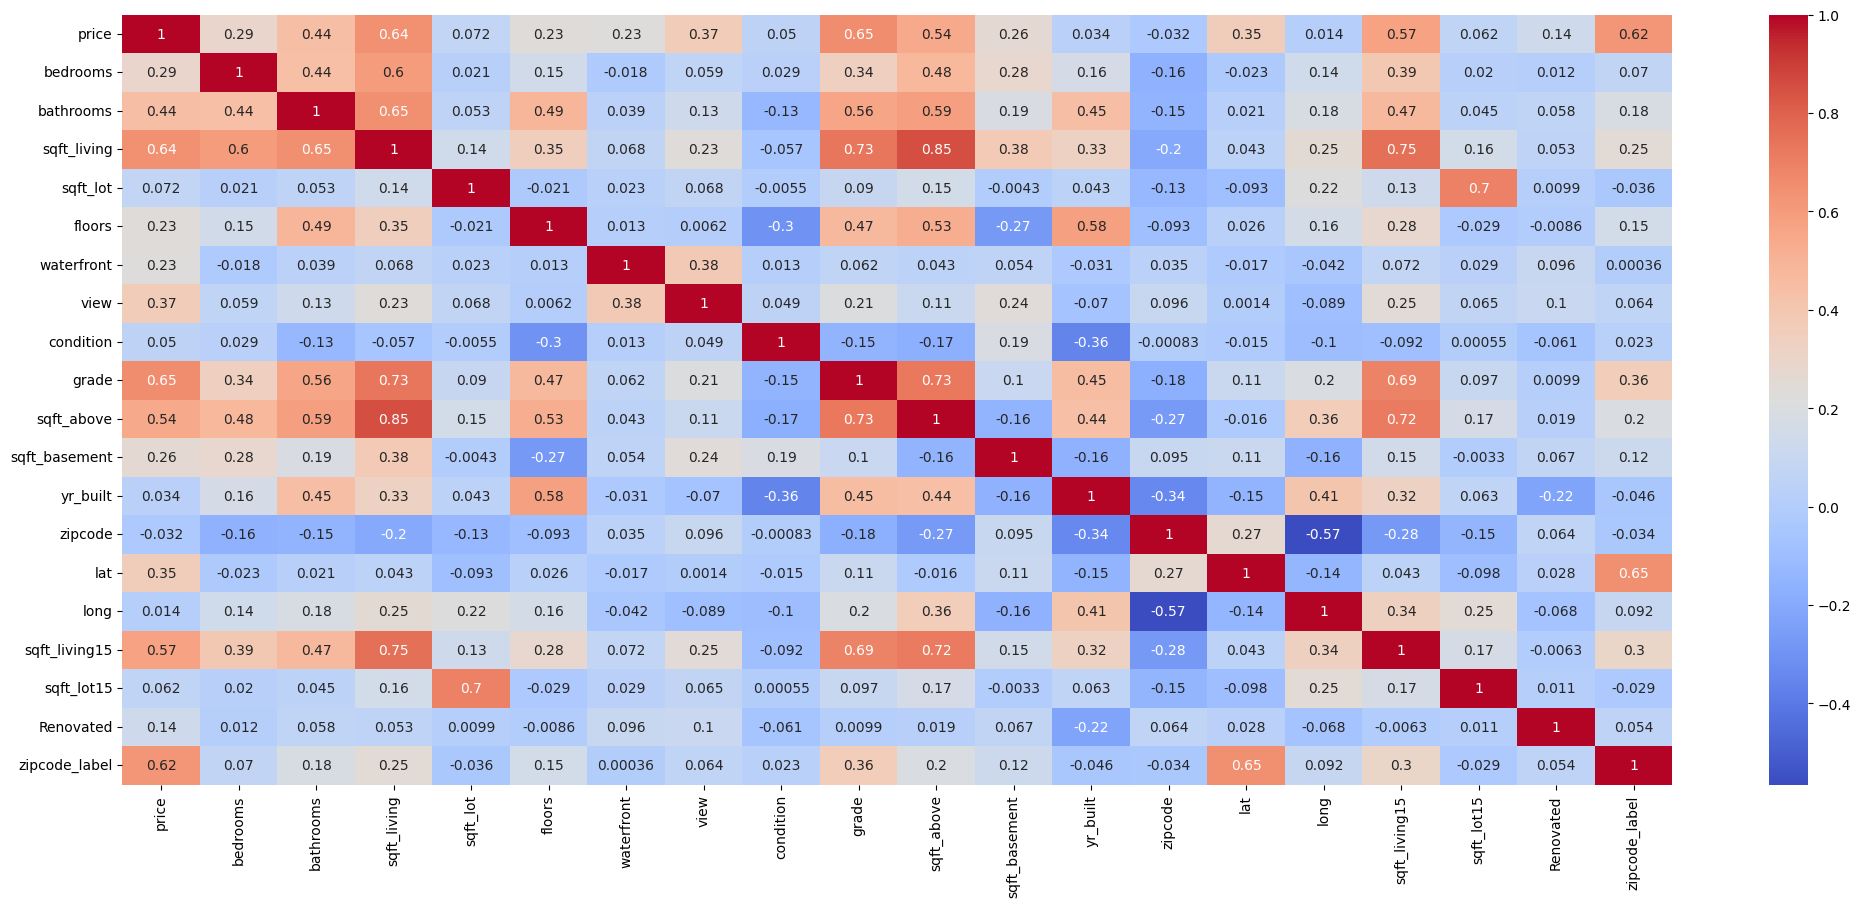

In [59]:
plt.figure(figsize=(25,10))
df_housing_model.drop(columns=["id","date"],inplace=True)
sns.heatmap(df_housing_model.corr(), annot=True, cmap='coolwarm')

In [60]:
"""unique_zipcodes=df_housing_model["zipcode_label"].unique()
sorted_zipcodes = np.sort(unique_zipcodes)
sorted_zipcodes"""

"""df_exp=df_housing_model[["zipcode","zipcode_label"]]
df_exp.to_excel("validate.xlsx")"""

'df_exp=df_housing_model[["zipcode","zipcode_label"]]\ndf_exp.to_excel("validate.xlsx")'

<Axes: >

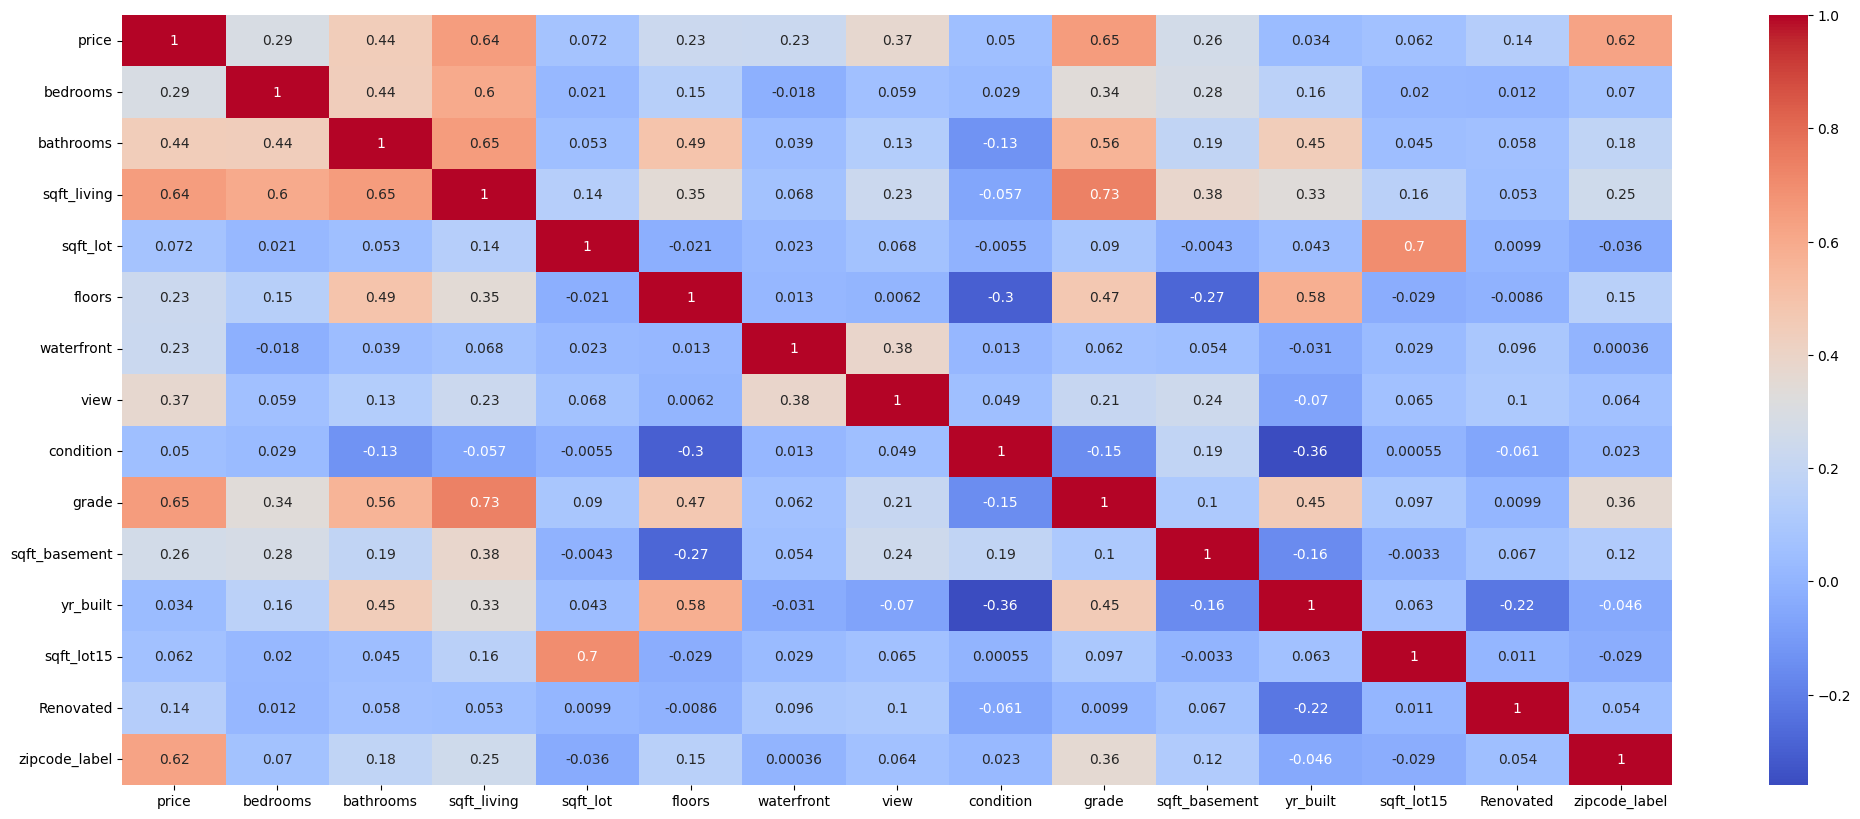

In [61]:
plt.figure(figsize=(25,10))
df_housing_model.drop(columns=["zipcode","lat","long","sqft_above","sqft_living15"],inplace=True)
sns.heatmap(df_housing_model.corr(), annot=True, cmap='coolwarm')

C:\Users\alexa\AppData\Local\Temp\ipykernel_8864\1137701156.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')


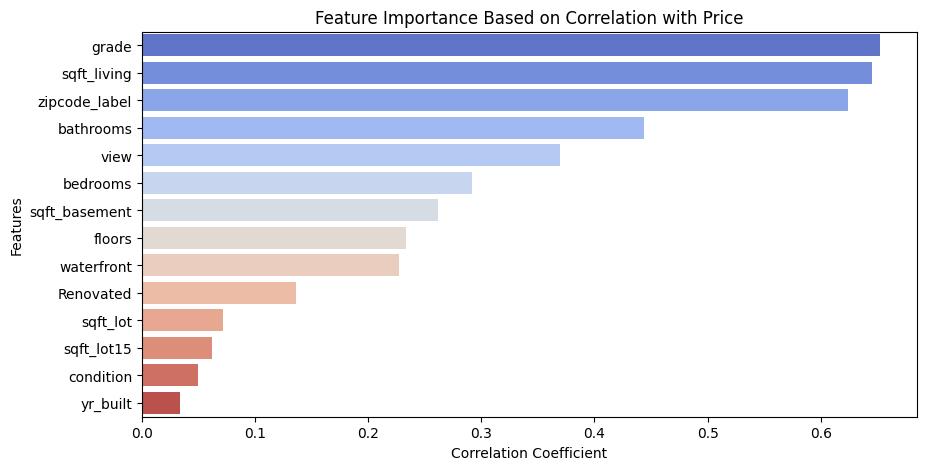

In [62]:
# Extract correlation with the target variable
correlation_matrix = df_housing_model.corr()
correlation_with_target = correlation_matrix["price"].drop("price")  # Drop correlation of the target with itself

# Sort the correlations by their absolute value
correlation_with_target = correlation_with_target.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')
plt.title("Feature Importance Based on Correlation with Price")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.savefig('static/img/feature_importance_corr_price.png')

MULTIPLE LINEAR REGRESSION

In [63]:
# Import the scaler function
X = df_housing_model.copy()
X = X.drop(columns = ["price"])
y = df_housing_model[["price"]]

# Select the columns to scale
features = X.columns
# Initialize the StandardScaler
scaler = MinMaxScaler()

# Adjust and transform data
X[features] = scaler.fit_transform(X[features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_lot15,Renovated,zipcode_label
0,0.2,0.000000,0.192214,0.003108,0.0,0.0,0.0,0.5,0.333333,0.000000,0.478261,0.008927,0.0,0.130435
1,0.4,0.333333,0.530414,0.004072,0.5,0.0,0.0,0.5,0.333333,0.178571,0.443478,0.012479,1.0,0.449275
2,0.2,0.000000,0.092457,0.005743,0.0,0.0,0.0,0.5,0.222222,0.000000,0.286957,0.013235,0.0,0.507246
3,0.6,0.666667,0.381995,0.002714,0.0,0.0,0.0,1.0,0.333333,0.406250,0.565217,0.007767,0.0,0.565217
4,0.4,0.333333,0.313869,0.004579,0.0,0.0,0.0,0.5,0.444444,0.000000,0.756522,0.012236,0.0,0.797101


       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
4577        1.0   1.000000     0.659367  0.005366     1.0         0.0   0.5   
5170        0.4   0.000000     0.306569  0.004941     0.0         0.0   0.0   
6482        0.6   0.333333     0.472019  0.005133     0.5         0.0   0.0   
19589       0.2   0.333333     0.204380  0.000338     0.5         0.0   0.0   
7405        0.6   0.000000     0.270073  0.006712     0.0         0.0   0.0   
...         ...        ...          ...       ...     ...         ...   ...   
5446        0.2   0.000000     0.163017  0.003625     0.0         0.0   0.0   
4371        0.8   0.666667     0.922141  0.004871     0.5         0.0   0.0   
7881        0.6   0.666667     0.647202  0.003428     0.5         0.0   0.0   
1588        0.4   0.000000     0.484185  0.003108     0.0         0.0   0.5   
6105        0.2   0.000000     0.107056  0.002108     0.0         0.0   0.0   

       condition     grade  sqft_basement  yr_built

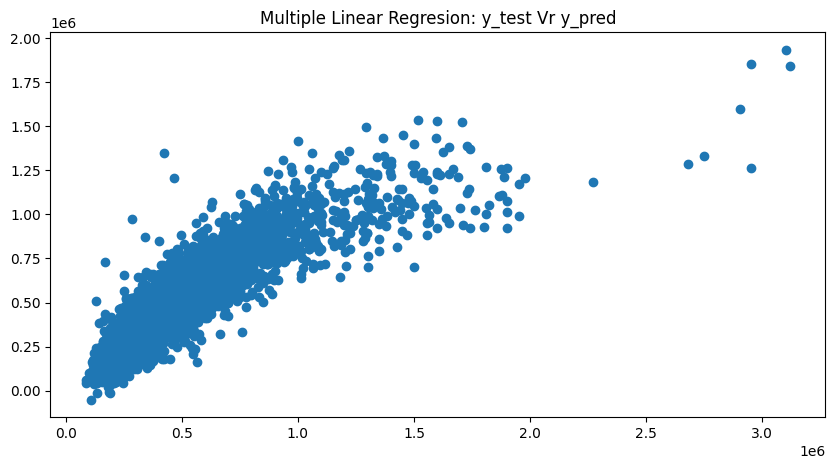

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)    
y_pred = model.predict(X_test) 

print(X_test)
print(y_test)
print(y_pred)

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

#saving the model and the scaler as pickle files
joblib.dump(model, 'pickle/multiple_linear_regression/linear_regression_model.pkl')
joblib.dump(scaler, 'pickle/scaler/minmax_scaler.pkl')

print(f"Root Mean Squared Error: {round(rmse,3)}");   print(f"R2 Score: {round(r2,5)}")
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.title('Multiple Linear Regresion: y_test Vr y_pred')
plt.savefig('static/img/mlr_plot_testvspred.png')

exit = dict()
exit["linear_regression_r2"] = r2
exit["linear_regression_rmse"] = rmse

(4219, 1)
(4219, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


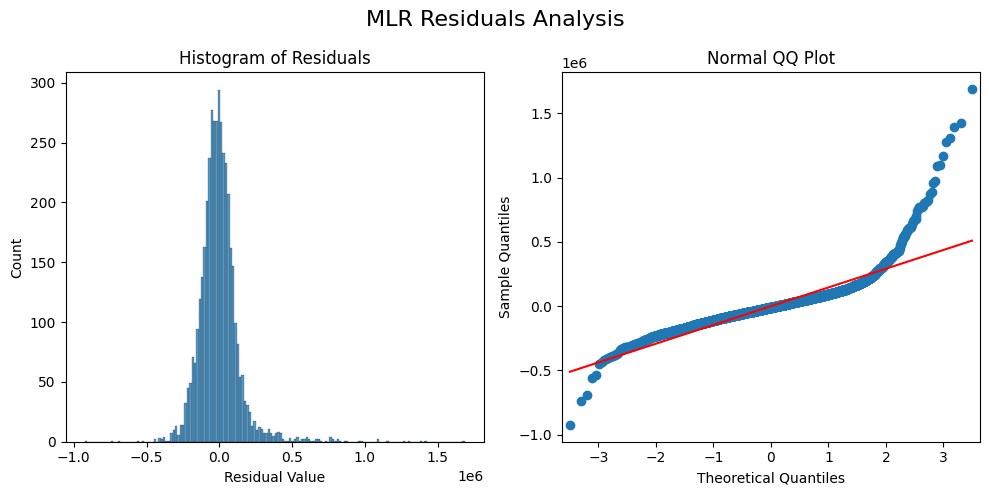

In [65]:
print(y_test.shape)
print(y_pred.shape)
print(type(y_test))
print(type(y_pred))

residuals = y_test.values.flatten() - y_pred.flatten()
fig, axes = plt.subplots(1, 2, figsize = (10,5))         # Create a 1x2 plot figure.
# Create a histogram with the residuals. 
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")                    # Set the x label of the residual plot.
axes[0].set_title("Histogram of Residuals")             # Set the title of the residual plot.

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")                     # Set the title of the Q-Q plot.
fig.suptitle("MLR Residuals Analysis", fontsize=16)
plt.tight_layout()                                      # Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.savefig('static/img/mlr_residuals_plot.png')

Root Mean Squared Error: 145958.967
R2 Score: 0.75205


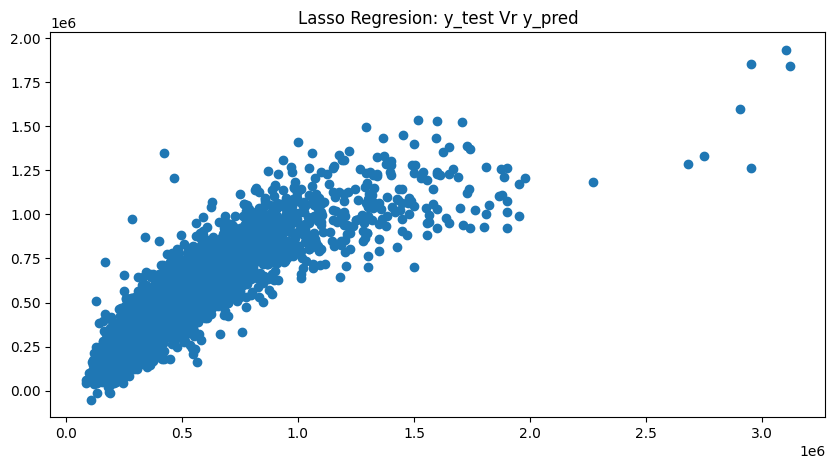

In [66]:
lasso_model = Lasso(alpha=1) 
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

#saving the model as pickle file
joblib.dump(lasso_model, 'pickle/multiple_linear_regression/linear_regression_lasso_model.pkl')

print(f"Root Mean Squared Error: {round(rmse,3)}");   print(f"R2 Score: {round(r2,5)}")
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.title('Lasso Regresion: y_test Vr y_pred')
plt.savefig('static/img/mlr_lasso_plot_testvspred.png')

exit["lasso_regression_r2"] = r2
exit["lasso_regression_rmse"] = rmse

(4219, 1)
(4219,)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


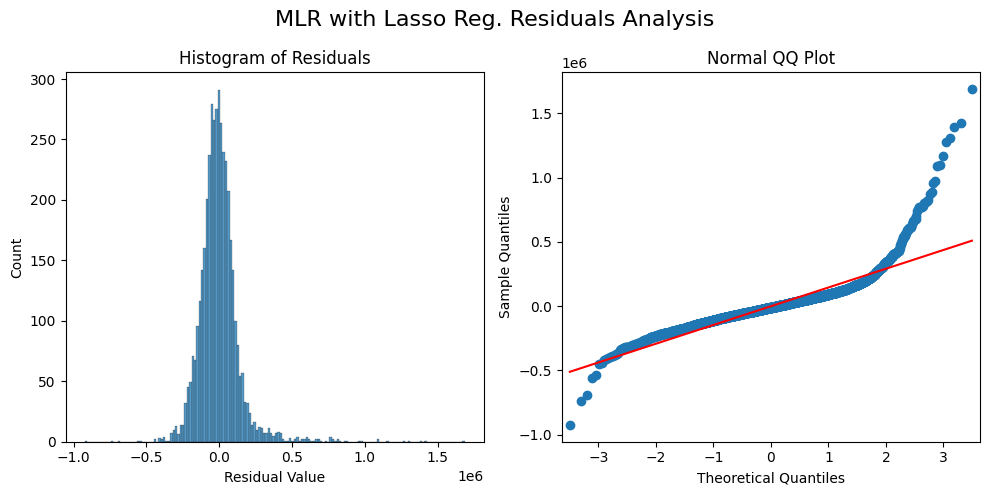

In [67]:
print(y_test.shape)
print(y_pred.shape)
print(type(y_test))
print(type(y_pred))

residuals = y_test.values.flatten() - y_pred.flatten()
fig, axes = plt.subplots(1, 2, figsize = (10,5))         # Create a 1x2 plot figure.
# Create a histogram with the residuals. 
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")                    # Set the x label of the residual plot.
axes[0].set_title("Histogram of Residuals")             # Set the title of the residual plot.

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")                     # Set the title of the Q-Q plot.
fig.suptitle("MLR with Lasso Reg. Residuals Analysis", fontsize=16)
plt.tight_layout()                                      # Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.savefig('static/img/mlr_lasso_residuals_plot.png')

Root Mean Squared Error: 145959.594
R2 Score: 0.75205


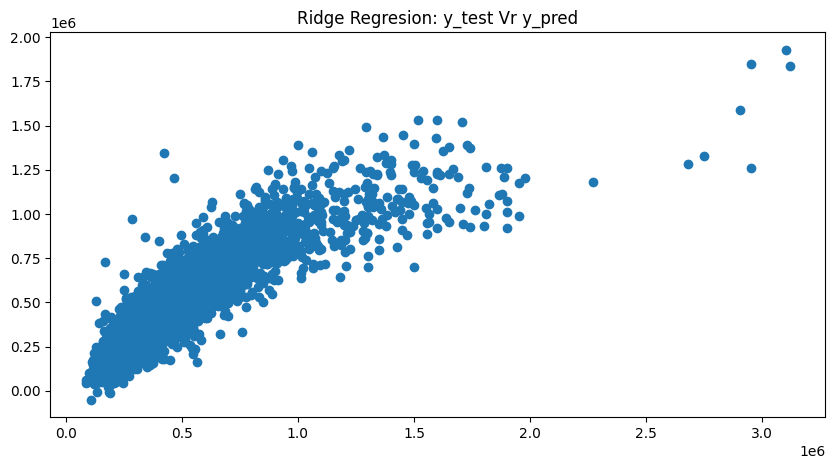

In [68]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

#saving the model as pickle file
joblib.dump(ridge_model, 'pickle/multiple_linear_regression/linear_regression_ridge_model.pkl')

print(f"Root Mean Squared Error: {round(rmse,3)}");   print(f"R2 Score: {round(r2,5)}")
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.title('Ridge Regresion: y_test Vr y_pred')
plt.savefig('static/img/mlr_ridge_plot_testvspred.png')

exit["ridge_regression_r2"] = r2
exit["ridge_regression_rmse"] = rmse

(4219, 1)
(4219, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


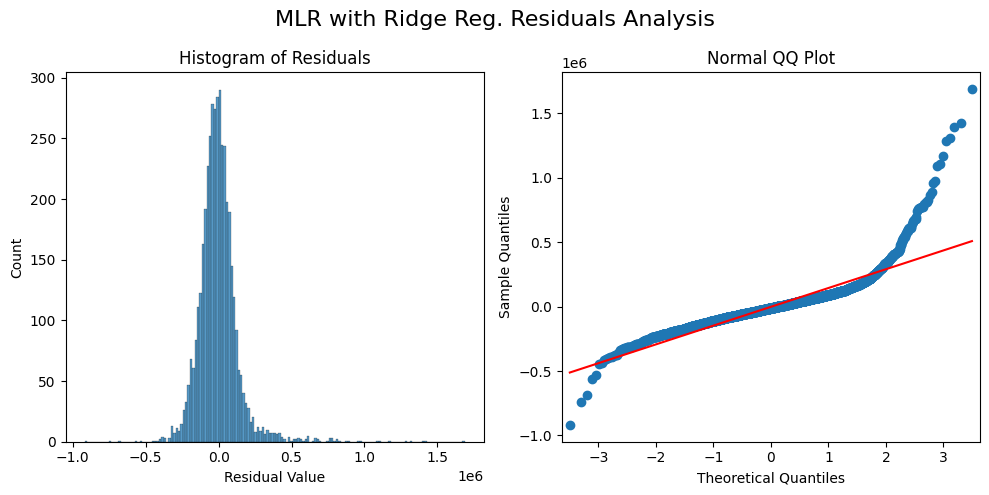

In [69]:
print(y_test.shape)
print(y_pred.shape)
print(type(y_test))
print(type(y_pred))

residuals = y_test.values.flatten() - y_pred.flatten()
fig, axes = plt.subplots(1, 2, figsize = (10,5))         # Create a 1x2 plot figure.
# Create a histogram with the residuals. 
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")                    # Set the x label of the residual plot.
axes[0].set_title("Histogram of Residuals")             # Set the title of the residual plot.

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")                     # Set the title of the Q-Q plot.
fig.suptitle("MLR with Ridge Reg. Residuals Analysis", fontsize=16)
plt.tight_layout()                                      # Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.savefig('static/img/mlr_ridge_residuals_plot.png')

Root Mean Squared Error: 257987.874
R2 Score: 0.22536


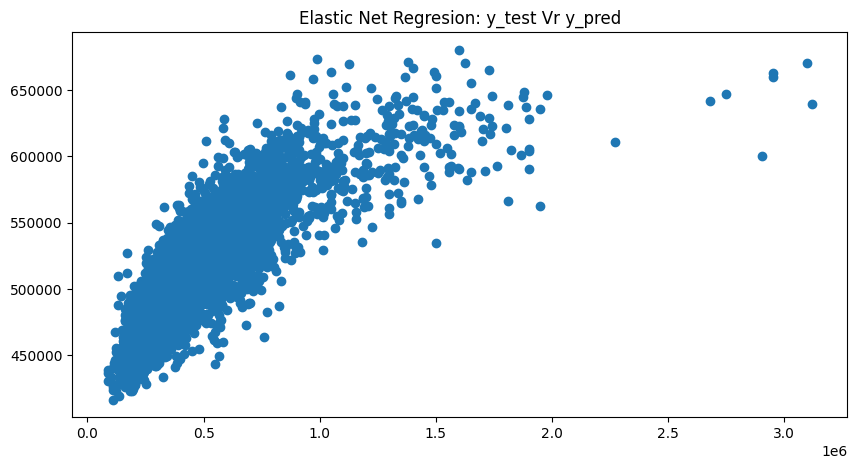

In [70]:
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
y_pred = elastic_net_model.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

#saving the model as pickle file
joblib.dump(elastic_net_model, 'pickle/multiple_linear_regression/linear_regression_elasticnet_model.pkl')

print(f"Root Mean Squared Error: {round(rmse,3)}");   print(f"R2 Score: {round(r2,5)}")
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.title('Elastic Net Regresion: y_test Vr y_pred')
plt.savefig('static/img/mlr_elasticnet_plot_testvspred.png')

exit["elastic_net_regression_r2"] = r2
exit["elastic_net_regression_rmse"] = rmse

(4219, 1)
(4219,)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


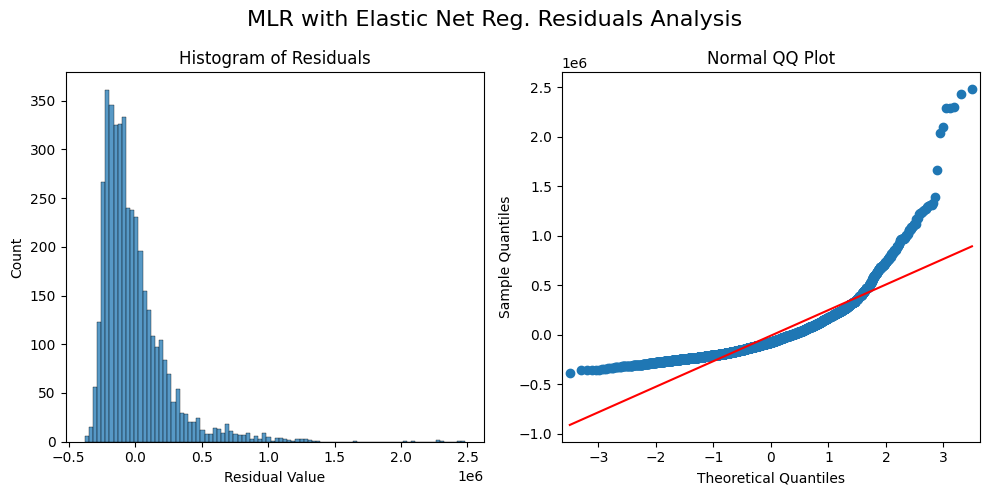

In [71]:
print(y_test.shape)
print(y_pred.shape)
print(type(y_test))
print(type(y_pred))

residuals = y_test.values.flatten() - y_pred.flatten()
fig, axes = plt.subplots(1, 2, figsize = (10,5))         # Create a 1x2 plot figure.
# Create a histogram with the residuals. 
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")                    # Set the x label of the residual plot.
axes[0].set_title("Histogram of Residuals")             # Set the title of the residual plot.

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")                     # Set the title of the Q-Q plot.
fig.suptitle("MLR with Elastic Net Reg. Residuals Analysis", fontsize=16)
plt.tight_layout()                                      # Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.savefig('static/img/mlr_elasticnet_residuals_plot.png')

In [72]:
"""model = salida["linear_regression"]
y_pred = model.predict(X_test) 
y_pred"""

'model = salida["linear_regression"]\ny_pred = model.predict(X_test) \ny_pred'

In [73]:
with open('pickle/multiple_linear_regression/mlr.pkl', 'wb') as handle:
    pickle.dump(exit, handle, protocol=pickle.HIGHEST_PROTOCOL)           #HIGHEST_PROTOCOL: instructing pickle to use the most recent protocol available in your version of Python

In [74]:
with open('pickle/multiple_linear_regression/mlr.pkl', 'rb') as handle:
        pickle_dict = pickle.load(handle)

In [75]:
pickle_dict

{'linear_regression_r2': np.float64(0.7520465866595691),
 'linear_regression_rmse': 145960.33515441092,
 'lasso_regression_r2': np.float64(0.752051235621829),
 'lasso_regression_rmse': 145958.96681819586,
 'ridge_regression_r2': np.float64(0.7520491063114341),
 'ridge_regression_rmse': 145959.5935429928,
 'elastic_net_regression_r2': np.float64(0.22536168517765587),
 'elastic_net_regression_rmse': 257987.87383151433}

In [76]:
import joblib
loaded_model = joblib.load('pickle/multiple_linear_regression/linear_regression_model.pkl')
loaded_scaler = joblib.load('pickle/scaler/minmax_scaler.pkl')

data = {
    'bedrooms': [6],
    'bathrooms': [4],
    'sqft_living': [3100],
    'sqft_lot': [9378],
    'floors': [3],
    'waterfront': [0],
    'view': [2],
    'condition': [3],
    'grade': [11],
    'sqft_basement': [0],
    'yr_built': [1978],
    'sqft_lot15': [6334],
    'Renovated': [0],
    'zipcode_label': [67]
}

#feat=pickle_dict["features"]

# Crear el DataFrame
df = pd.DataFrame(data)

#dat = scal.transform(df[feat])
dat = loaded_scaler.transform(df)
print(dat)
prediction=loaded_model.predict(dat)
print(prediction)

[[1.         1.         0.6593674  0.00536576 1.         0.
  0.5        0.5        0.77777778 0.         0.67826087 0.01014883
  0.         0.95652174]]
[[1231734.30012201]]


c:\web python\VIZ\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


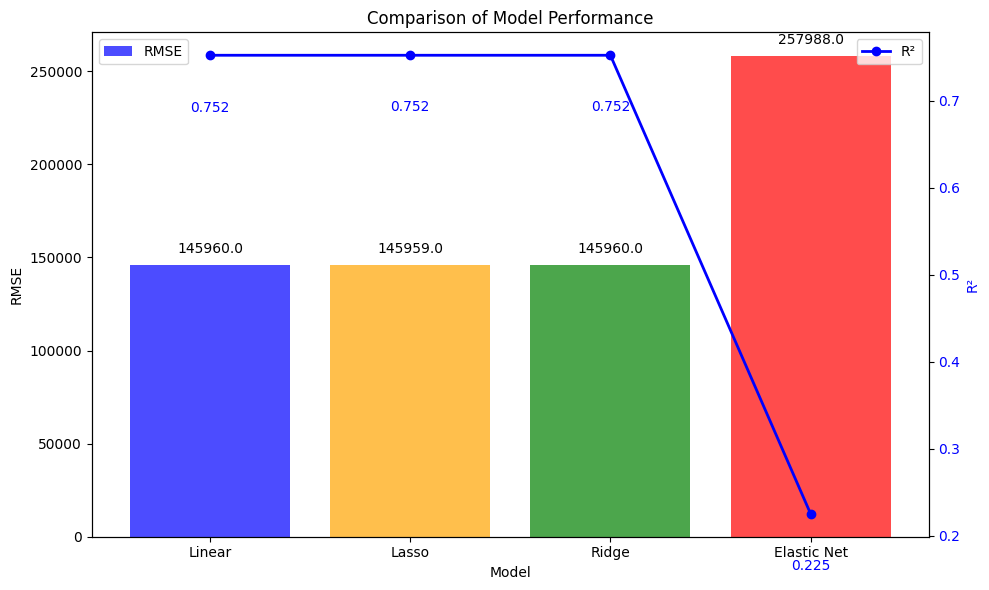

In [77]:
# Create a DataFrame with the comparison metrics
data = {
    "Model": ["Linear", "Lasso", "Ridge", "Elastic Net"],
    "RMSE": [pickle_dict["linear_regression_rmse"], pickle_dict["lasso_regression_rmse"], pickle_dict["ridge_regression_rmse"], pickle_dict["elastic_net_regression_rmse"]],
    "R²": [pickle_dict["linear_regression_r2"], pickle_dict["lasso_regression_r2"], pickle_dict["ridge_regression_r2"], pickle_dict["elastic_net_regression_r2"]]
}

df_comparison = pd.DataFrame(data)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Colors for bars and line
bar_colors = ['blue', 'orange', 'green', 'red']
line_color = 'blue'  # Line color for R²

# Plot RMSE values on the left y-axis
bars = ax1.bar(df_comparison['Model'], df_comparison['RMSE'], color=bar_colors, alpha=0.7, label='RMSE')
ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Add labels on top of each bar, outside the bar
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 5000, round(yval, 0), ha='center', va='bottom', fontsize=10, color='black')  # placed above the bar

# Create another y-axis for R² values
ax2 = ax1.twinx()
ax2.plot(df_comparison['Model'], df_comparison['R²'], color=line_color, marker='o', linestyle='-', linewidth=2, label='R²')
ax2.set_ylabel('R²', color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)

# Adjust the position of R² labels to avoid overlap with the line
for i, r2 in enumerate(df_comparison['R²']):
    y_offset = 0.05 if r2 == 0.215 else -0.06  # Adjusting based on the value to avoid overlap
    ax2.text(i, r2 + y_offset, f'{r2:.3f}', color=line_color, ha='center', va='center', fontsize=10)

plt.title('Comparison of Model Performance')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()  # ensure no overlap in the layout
plt.savefig('static/img/comparison_model_performance.png')